In [ ]:
# Install (if needed)
# !pip install numpy pandas matplotlib scikit-learn tensorflow statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


In [ ]:
# Install (if needed)
# !pip install numpy pandas matplotlib scikit-learn tensorflow statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


In [ ]:
# Install (if needed)
# !pip install numpy pandas matplotlib scikit-learn tensorflow statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


In [ ]:
pip install tensorflow

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

<module 'matplotlib.pyplot' from 'c:\\Users\\Lenovo\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

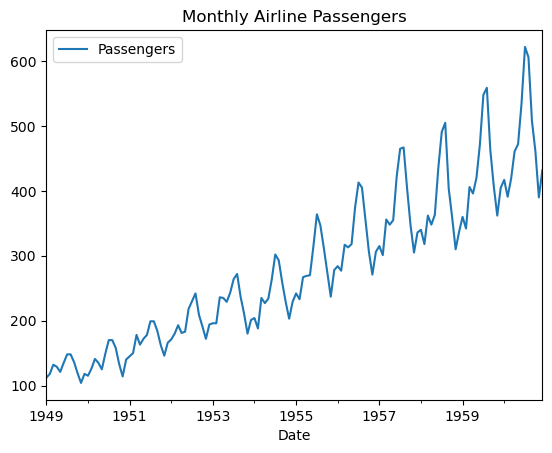

In [9]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.columns = ['Passengers']

# Plot
df.plot(title="Monthly Airline Passengers")
plt.xlabel("Date")
plt


In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Passengers']])

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM/GRU [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, verbose=1)

# Make predictions
lstm_pred_scaled = model_lstm.predict(X_test)

# Inverse scale the predictions
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


c:\Users\Lenovo\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1107
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0998
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0841
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0703
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0652
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0440
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0290
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0196
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0154
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0139
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0129
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0103
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0105
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━

In [12]:
from tensorflow.keras.layers import GRU

# Define the GRU model
model_gru = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model_gru.compile(optimizer='adam', loss='mse')

# Train the model
model_gru.fit(X_train, y_train, epochs=20, verbose=1)

# Make predictions
gru_pred_scaled = model_gru.predict(X_test)

# Inverse scale the predictions
gru_pred = scaler.inverse_transform(gru_pred_scaled)


Epoch 1/20


c:\Users\Lenovo\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1006
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0671
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0429 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0267
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0122
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0130
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0140
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0116
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0103
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0098
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0099
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Fit ARIMA model (ARIMA(p,d,q))
model_arima = ARIMA(df['Passengers'], order=(5,1,0))  # You can experiment with order
model_arima_fit = model_arima.fit()

# Forecast on test period length
n_test = len(y_test)
arima_forecast = model_arima_fit.forecast(steps=n_test)

# Align index for plotting
arima_forecast.index = df.index[-n_test:]


In [14]:
from statsmodels.tsa.ar_model import AutoReg

# Difference the data to make it stationary (for ARMA)
diff_data = df['Passengers'].diff().dropna()

# Fit ARMA model using AutoReg (ARMA(p,q) is deprecated; AR can be used as a simplified form)
arma_model = AutoReg(diff_data, lags=5)  # 5 is the AR lag, adjust if needed
arma_result = arma_model.fit()

# Forecast differenced values
arma_forecast_diff = arma_result.predict(start=len(diff_data), end=len(diff_data)+len(y_test)-1)

# Convert forecasted differences back to actual values
last_value = df['Passengers'].iloc[-(len(y_test)+1)]
arma_forecast = arma_forecast_diff.cumsum() + last_value

# Align index
arma_forecast.index = df.index[-len(y_test):]


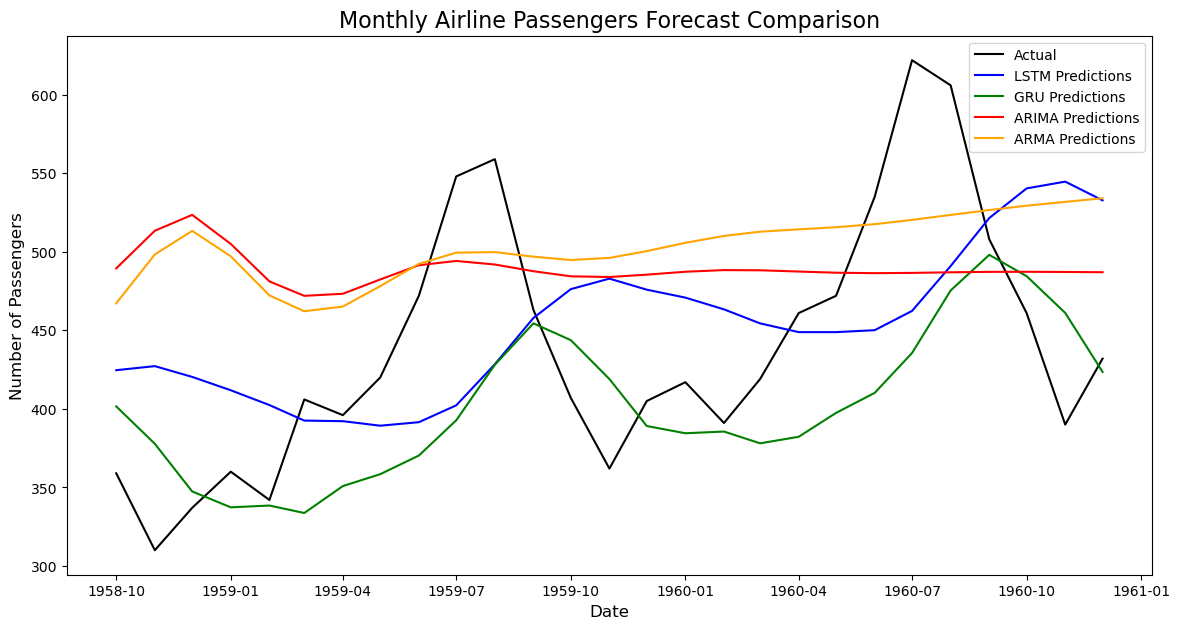

In [15]:
import matplotlib.pyplot as plt

# Prepare the plot
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(df.index[-len(y_test):], y_test_actual, label="Actual", color='black')

# Plot LSTM predictions
plt.plot(df.index[-len(y_test):], lstm_pred, label="LSTM Predictions", color='blue')

# Plot GRU predictions
plt.plot(df.index[-len(y_test):], gru_pred, label="GRU Predictions", color='green')

# Plot ARIMA predictions
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Predictions", color='red')

# Plot ARMA predictions
plt.plot(arma_forecast.index, arma_forecast, label="ARMA Predictions", color='orange')

# Add title and labels
plt.title("Monthly Airline Passengers Forecast Comparison", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.legend()

# Show the plot
plt.show()
